In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x2iez2z1 because the default path (/home/marco/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
df = pd.read_csv('/home/marco/Documentos/Machine/Machine_Learning/datasets/bank-data.csv')
df.head()


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600,600.000000,600,600,600.000000,600,600.000000,600,600,600,600,600
unique,600,NaN,2,4,NaN,2,NaN,2,2,2,2,2
top,ID12101,NaN,FEMALE,INNER_CITY,NaN,YES,NaN,NO,YES,YES,NO,NO
freq,1,NaN,300,269,NaN,396,NaN,304,414,455,391,326
mean,NaN,42.395000,NaN,NaN,27524.031217,NaN,1.011667,NaN,NaN,NaN,NaN,NaN
std,NaN,14.424947,NaN,NaN,12899.468246,NaN,1.056752,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,5014.210000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,30.000000,NaN,NaN,17264.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.000000,NaN,NaN,24925.300000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.250000,NaN,NaN,36172.675000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='income', ylabel='Count'>

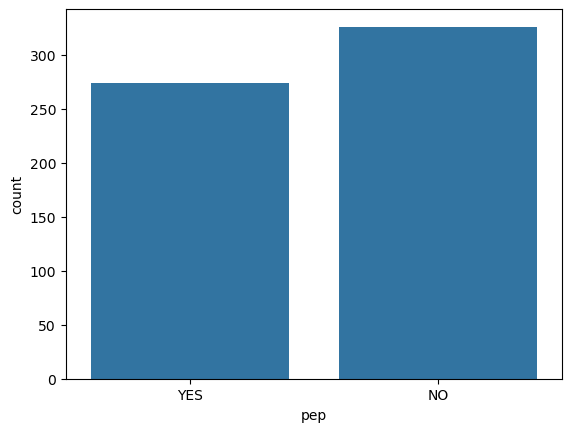

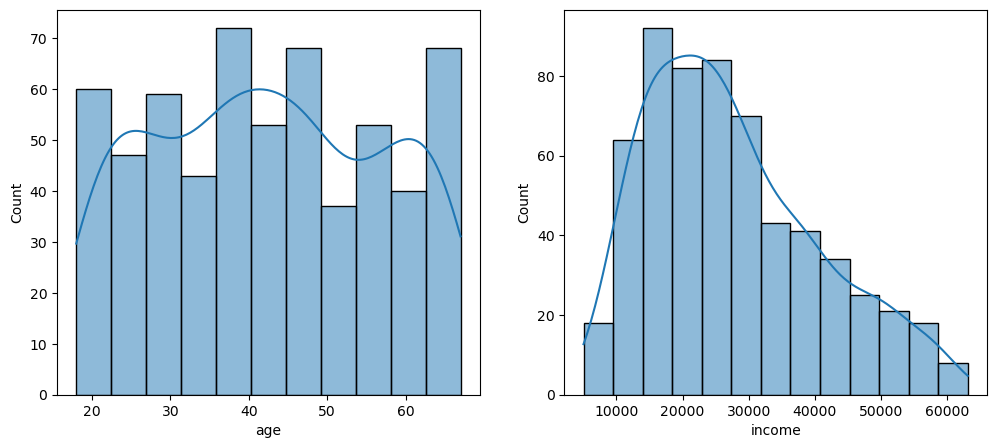

In [5]:
# Distribuição da variável alvo
sns.countplot(x='pep', data=df)

# Distribuição de idade e renda
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['age'], kde=True, ax=ax[0])
sns.histplot(df['income'], kde=True, ax=ax[1])


<AxesSubplot: >

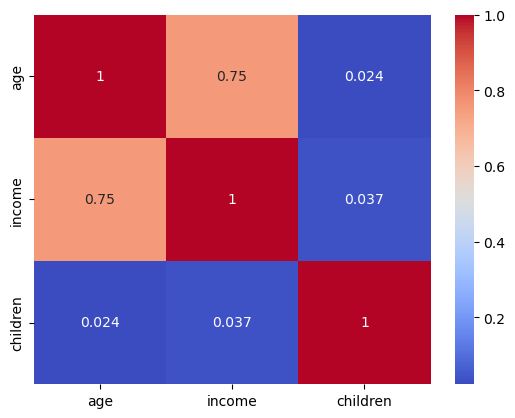

In [6]:
# Correlação entre variáveis numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [7]:
df.isnull().sum()  # Verificar valores ausentes

# Remover ou preencher valores nulos se existirem
df.dropna(inplace=True)


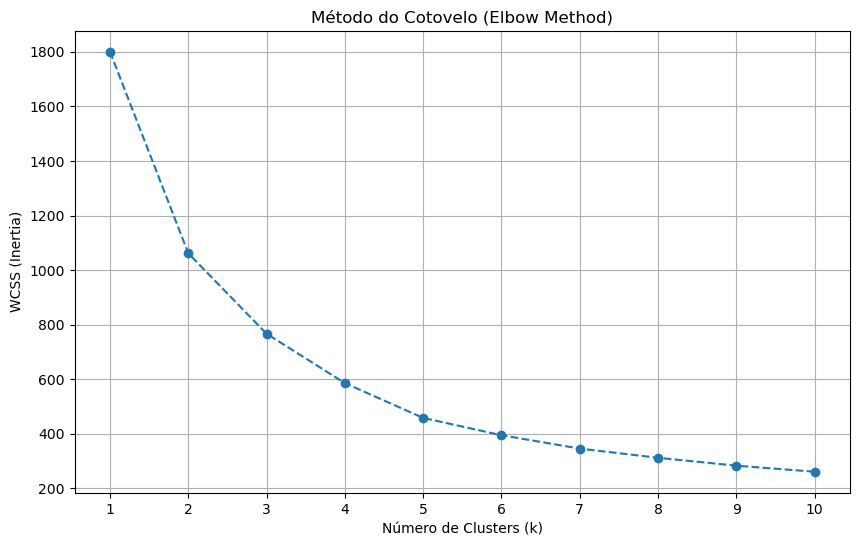

In [8]:
wcss = []
k_range = range(1, 11) # Testar k de 1 a 10

# Re-usar os dados escalados da célula seguinte (ou recalcular aqui se preferir)
temp_scaler = StandardScaler()
temp_data_scaled = temp_scaler.fit_transform(df[numeric_cols_for_kmeans].copy()) # Usar as mesmas colunas

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(temp_data_scaled) # Usar os dados escalados
    wcss.append(kmeans_elbow.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Coluna 'cluster' adicionada ao DataFrame:
        id cluster
0  ID12101       0
1  ID12102       2
2  ID12103       0
3  ID12104       2
4  ID12105       1


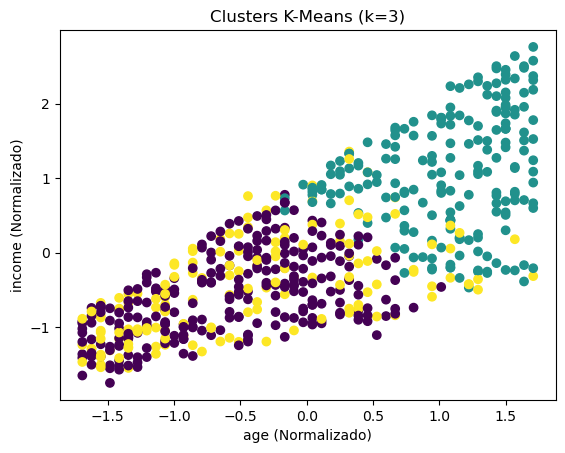

In [9]:

# Selecionar colunas numéricas para clusterização
numeric_cols_for_kmeans = ['age', 'income', 'children']
kmeans_data = df[numeric_cols_for_kmeans].copy()

# Normalizar os dados para K-Means
scaler_kmeans = StandardScaler()
kmeans_data_scaled = scaler_kmeans.fit_transform(kmeans_data)

# Aplicar K-Means
# Você pode experimentar diferentes valores para n_clusters ou usar o método Elbow para encontrar um valor ideal
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Adicionado n_init=10 para suprimir warning
df['cluster'] = kmeans.fit_predict(kmeans_data_scaled)

# Converter a coluna cluster para tipo 'category' para o One-Hot Encoding posterior
df['cluster'] = df['cluster'].astype('category')

print("Coluna 'cluster' adicionada ao DataFrame:")
print(df[['id', 'cluster']].head())

# (Opcional) Visualização dos clusters (pode ser mantida ou removida)
plt.scatter(kmeans_data_scaled[:, 0], kmeans_data_scaled[:, 1], c=df['cluster'], cmap='viridis') # Remover espaço inicial
plt.title(f'Clusters K-Means (k={n_clusters})') # Remover espaço inicial
plt.xlabel(f'{numeric_cols_for_kmeans[0]} (Normalizado)') # Remover espaço inicial
plt.ylabel(f'{numeric_cols_for_kmeans[1]} (Normalizado)') # Remover espaço inicial
plt.show() # Remover espaço inicial

Coluna 'cluster' adicionada ao DataFrame (usando features estendidas):
        id cluster
0  ID12101       2
1  ID12102       2
2  ID12103       0
3  ID12104       2
4  ID12105       1


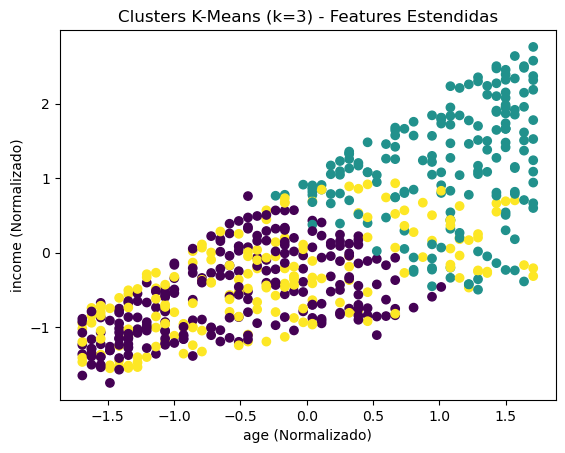

In [22]:
# --- K-Means para Feature Augmentation ---

# Selecionar colunas para clusterização
cols_for_kmeans = ['age', 'income', 'children', 'married', 'save_act']
kmeans_data_prep = df[cols_for_kmeans].copy()

# Codificar features categóricas selecionadas (exemplo simples)
kmeans_data_prep['married'] = kmeans_data_prep['married'].map({'NO': 0, 'YES': 1})
kmeans_data_prep['save_act'] = kmeans_data_prep['save_act'].map({'NO': 0, 'YES': 1})
# Adicione outras codificações se necessário

# Normalizar TODOS os dados selecionados para K-Means
scaler_kmeans = StandardScaler()
kmeans_data_scaled = scaler_kmeans.fit_transform(kmeans_data_prep)

# Aplicar K-Means (usando k do Elbow Method ou um valor escolhido)
n_clusters = 3 # Ajuste conforme o Elbow Method ou sua escolha
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(kmeans_data_scaled)

# Converter a coluna cluster para tipo 'category'
df['cluster'] = df['cluster'].astype('category')

print("Coluna 'cluster' adicionada ao DataFrame (usando features estendidas):")
print(df[['id', 'cluster']].head())

# (Opcional) Visualização - Note que a visualização 2D só mostra as 2 primeiras features
plt.scatter(kmeans_data_scaled[:, 0], kmeans_data_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title(f'Clusters K-Means (k={n_clusters}) - Features Estendidas')
plt.xlabel(f'{cols_for_kmeans[0]} (Normalizado)')
plt.ylabel(f'{cols_for_kmeans[1]} (Normalizado)')
plt.show()

In [11]:

# cat_cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep'] # Linha original
cat_cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep', 'cluster'] # Inclui 'cluster'
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [12]:
cat_cols = ['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [13]:
scaler = StandardScaler()
df_encoded[['age', 'income', 'children']] = scaler.fit_transform(df_encoded[['age', 'income', 'children']])


In [14]:
X = df_encoded.drop(['id', 'pep_YES'], axis=1)
y = df_encoded['pep_YES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
lr = LogisticRegression(max_iter=1000) # Aumentar max_iter se houver warning de convergência
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("-" * 30)


--- Logistic Regression ---
Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.64      0.62        66
        True       0.53      0.50      0.51        54

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.57      0.57      0.57       120


Confusion Matrix:
 [[42 24]
 [27 27]]
------------------------------


In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree.predict(X_test)))


Decision Tree Accuracy: 0.8416666666666667


In [17]:
# Adicionar após o treino da Árvore de Decisão (célula id="d54a236f")
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False)
print("\nFeature Importances (Decision Tree):\n", importances)


Feature Importances (Decision Tree):
             feature  importance
1            income       0.273
2          children       0.263
0               age       0.113
3           cluster       0.090
12     mortgage_YES       0.086
8       married_YES       0.060
10     save_act_YES       0.048
7       region_TOWN       0.021
11  current_act_YES       0.018
9           car_YES       0.009
6   region_SUBURBAN       0.008
5      region_RURAL       0.007
4          sex_MALE       0.004


In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


KNN Accuracy: 0.7583333333333333


In [19]:
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))


SVM Accuracy: 0.775


In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")


Logistic Regression: Mean Accuracy = 0.6167
Decision Tree: Mean Accuracy = 0.8167
KNN: Mean Accuracy = 0.7617
SVM: Mean Accuracy = 0.7533


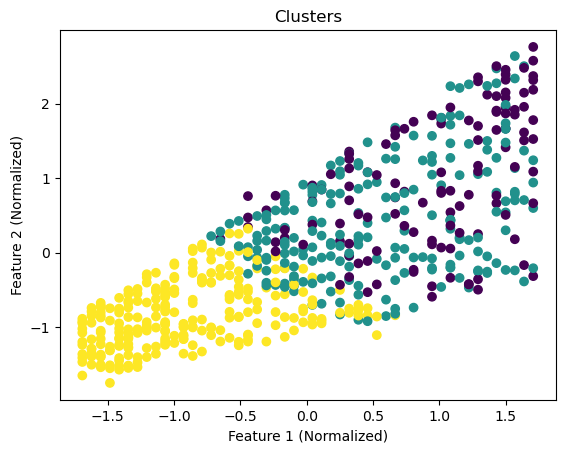

Centroids: [[ 0.91122783  0.95495915  1.12083305]
 [ 0.55642754  0.44346135 -0.74427662]
 [-0.89548385 -0.82188881  0.09094447]]


In [21]:

# Selecionar as colunas numéricas para o K-Means
numeric_columns = ['age', 'income', 'children']  # Ajuste conforme necessário
data = df[numeric_columns]

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters (se possível)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.show()

# Exibir os centróides
print("Centroids:", kmeans.cluster_centers_)